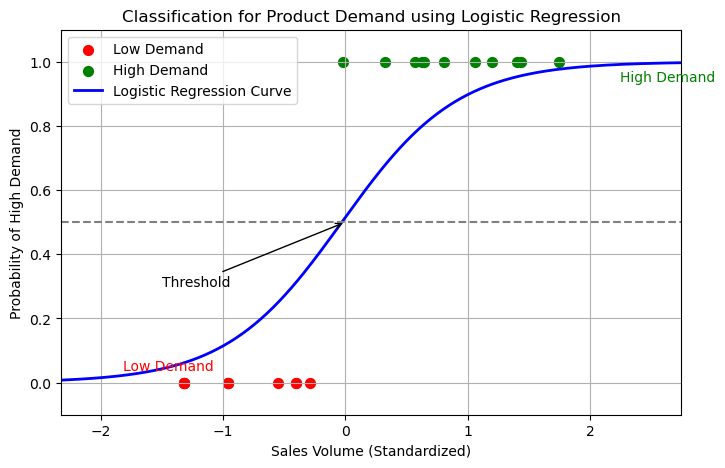

High Demand:
1. Colgate Maximum Cavity Protection Toothpaste 225G x 2's
2. Colgate Optic White Toothpaste 100g
3. Colgate Sensitive Pro Relief Toothpaste (110g/114g)
4. Colgate Triple Action Original Mint 175g (Value Pack of 2)
5. Daia Smart Concentrated Liquid Detergent Refill 1.7kg
6. Daia Softener Refill 900ml
7. Daia Softener Refill Pack 1.8L/1.6L
8. Daia Washing Power Powder [2.2KG / 2.3KG/2.4KG]
9. Garbage Bag Plastik Sampah Size S/M/L/XL
10. Softlan Fabric Softener Refill Pack 1.4L
11. Tracia Lightening Goat Milk / Shea Butter Shower Cream 1000ml

Low Demand:
1. Colgate Plax Mouthwash Valuepack 750ml x 2
2. Dettol Hand Wash (250ml) - Skincare
3. Dettol Hand Wash Skincare Pouch (225ml) Dettol Sakura Refill
4. F&N Sweetened & Condensed Filled Milk (500g)
5. Garnier Color Naturals Ultra Color Hair Dye Colour 30g
6. Life Tomato Sauce 485g
7. Mee Sedap Asli / Mi Sedaap Perisa Asli (5PCS x 90G)
8. OPP Tape Transparent 48mm x 80y Premium Grade
9. Quaker Oats - Whole Rolled Oats 800g
10

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

# Load the data from the CSV file
file_path = '22_product_quantities_random_restock_limited_no_stock.csv'  # Replace with your file path
product_data = pd.read_csv(file_path)

# Calculate Sales Volume and Restock Frequency for each product
sales_volumes = []
restock_frequencies = []

for _, row in product_data.iterrows():
    daily_changes = pd.to_numeric(row[1:].diff(), errors='coerce').fillna(0)
    sales_volume = -daily_changes[daily_changes < 0].sum()
    restock_frequency = (daily_changes > 0).sum()
    sales_volumes.append(sales_volume)
    restock_frequencies.append(restock_frequency)

# Add Sales Volume and Restock Frequency to the DataFrame
product_data['Sales_Volume'] = sales_volumes
product_data['Restock_Frequency'] = restock_frequencies

# Apply log transformation to Sales Volume to spread out values
product_data['Log_Sales_Volume'] = np.log1p(product_data['Sales_Volume'])  # log1p to handle zero values safely

# Use Log_Sales_Volume as a feature for logistic regression
X = product_data[['Log_Sales_Volume']].values
y = (product_data['Sales_Volume'] > np.median(product_data['Sales_Volume'])).astype(int)  # 1 if high demand, 0 if low

# Standardize the log-transformed feature for logistic regression
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)

# Train logistic regression model on standardized log-transformed feature
model = LogisticRegression()
model.fit(X_standardized, y)

# Predict probabilities for plotting the logistic regression curve
X_test_standardized = np.linspace(X_standardized.min() - 1, X_standardized.max() + 1, 300).reshape(-1, 1)
y_prob = model.predict_proba(X_test_standardized)[:, 1]

# Plotting the logistic regression curve with standardized log-transformed data
plt.figure(figsize=(8, 5))
plt.scatter(X_standardized[y == 0], y[y == 0], color='red', s=50, label="Low Demand", marker='o')
plt.scatter(X_standardized[y == 1], y[y == 1], color='green', s=50, label="High Demand", marker='o')
plt.plot(X_test_standardized, y_prob, color='blue', linewidth=2, label="Logistic Regression Curve")
plt.axhline(y=0.5, color='gray', linestyle='--')

# Adding an arrow annotation for threshold
plt.annotate('Threshold', xy=(0, 0.5), xytext=(-1.5, 0.3),
             arrowprops=dict(facecolor='black', arrowstyle='->'))

plt.text(X_standardized.min() - 0.5, 0.05, "Low Demand", color="red", verticalalignment='center')
plt.text(X_standardized.max() + 0.5, 0.95, "High Demand", color="green", verticalalignment='center')
plt.xlim(X_standardized.min() - 1, X_standardized.max() + 1)  # Set x-axis limits for more space
plt.ylim(-0.1, 1.1)  # Set y-axis limits for more space
plt.xlabel("Sales Volume (Standardized)")
plt.ylabel("Probability of High Demand")
plt.title("Classification for Product Demand using Logistic Regression")
plt.legend()
plt.grid(True)
plt.show()

# Predict and classify products based on demand
y_pred = model.predict(X_standardized)
product_data['Demand_Classification'] = y_pred

# Display High Demand and Low Demand products after showing the plot
print("High Demand:")
for i, product in enumerate(product_data[product_data['Demand_Classification'] == 1]['Product'], start=1):
    print(f"{i}. {product}")

print("\nLow Demand:")
for i, product in enumerate(product_data[product_data['Demand_Classification'] == 0]['Product'], start=1):
    print(f"{i}. {product}")
